In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math, copy
from ipywidgets import interact
import ipywidgets as widgets
import plotly.graph_objects as go

# Define the cost function (unchanged)

In [2]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.
    Args:
        x (ndarray (m,)): Data, m examples
        y (ndarray (m,)): Target values
        w, b (scalar): Model parameters
    Returns:
        total_cost (float): Mean squared error cost
    """
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost
    return total_cost

# Define the gradient function (unchanged)

In [3]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression.
    Args:
        x (ndarray (m,)): Data, m examples
        y (ndarray (m,)): Target values
        w, b (scalar): Model parameters
    Returns:
        dj_dw (scalar): Gradient of the cost w.r.t. w
        dj_db (scalar): Gradient of the cost w.r.t. b
    """
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

# Define gradient descent function (unchanged)

In [4]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b.
    Args:
        x (ndarray (m,)): Data, m examples
        y (ndarray (m,)): Target values
        w_in, b_in (scalar): Initial model parameters
        alpha (float): Learning rate
        num_iters (int): Number of iterations
        cost_function: Function to compute cost
        gradient_function: Function to compute gradient
    Returns:
        w (scalar): Updated w
        b (scalar): Updated b
        J_history (List): History of cost values
        p_history (List): History of parameters [w,b]
    """
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        if i < 100000:
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w, b, J_history, p_history


# Replacement for plt_house_x: Plot data and regression line

In [5]:
def plot_house_x(x_train, y_train, w, b):
    """
    Plots the dataset and the linear regression line.
    Args:
        x_train (ndarray): Features
        y_train (ndarray): Target values
        w, b (scalar): Model parameters
    """
    plt.close('all')
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(x_train, y_train, color='blue', label='Data')
    x_range = np.linspace(min(x_train), max(x_train), 100)
    y_pred = w * x_range + b
    ax.plot(x_range, y_pred, 'r-', label=f'y = {w:.1f}x + {b:.1f}')
    ax.set_xlabel('Size (1000 sq ft)')
    ax.set_ylabel('Price (1000s of dollars)')
    ax.set_title('House Price Prediction')
    ax.grid(True)
    ax.legend()
    plt.show()

# Replacement for plt_gradients: Interactive plot with sliders for w and b

In [6]:
def plot_gradients(x_train, y_train, cost_function, gradient_function):
    """
    Interactive plot showing data, regression line, and gradients.
    """
    def update_plot(w=100, b=100):
        plt.close('all')
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

        # Plot data and regression line
        ax1.scatter(x_train, y_train, color='blue', label='Data')
        x_range = np.linspace(min(x_train), max(x_train), 100)
        y_pred = w * x_range + b
        ax1.plot(x_range, y_pred, 'r-', label=f'y = {w:.1f}x + {b:.1f}')
        ax1.set_xlabel('Size (1000 sq ft)')
        ax1.set_ylabel('Price (1000s of dollars)')
        ax1.set_title('Linear Regression Fit')
        ax1.grid(True)
        ax1.legend()

        # Plot cost
        cost = cost_function(x_train, y_train, w, b)
        ax2.bar([0], [cost], color='orange')
        ax2.set_ylim(0, max(cost_function(x_train, y_train, 0, 0), 10000))
        ax2.set_xticks([])
        ax2.set_ylabel('Cost')
        ax2.set_title(f'Cost: {cost:.2f}')

        plt.show()

    interact(update_plot,
             w=widgets.FloatSlider(min=-200, max=600, step=10, value=100, description='w:'),
             b=widgets.FloatSlider(min=-200, max=400, step=10, value=100, description='b:'))

# Replacement for plt_contour_wgrad: Contour plot with gradient descent path

In [7]:
def plot_contour_wgrad(x_train, y_train, p_history, ax, w_range=None, b_range=None, contours=None, resolution=0.5):
    """
    Plots a contour of the cost function with the gradient descent path.
    Args:
        x_train, y_train: Data
        p_history: List of [w, b] parameters from gradient descent
        ax: Matplotlib axis
        w_range: [min, max, step] for w
        b_range: [min, max, step] for b
        contours: Cost levels to highlight
        resolution: Grid resolution
    """
    if w_range is None:
        w_range = [min([p[0] for p in p_history]) - 50, max([p[0] for p in p_history]) + 50, resolution]
    if b_range is None:
        b_range = [min([p[1] for p in p_history]) - 50, max([p[1] for p in p_history]) + 50, resolution]
    if contours is None:
        contours = [0.1, 0.5, 1, 5, 10, 20, 50, 100]

    w_values = np.arange(w_range[0], w_range[1], w_range[2])
    b_values = np.arange(b_range[0], b_range[1], b_range[2])
    W, B = np.meshgrid(w_values, b_values)
    Z = np.array([[compute_cost(x_train, y_train, w, b) for w in w_values] for b in b_values])

    ax.clear()
    ax.contour(W, B, Z, levels=contours, cmap='viridis')
    ax.plot([p[0] for p in p_history], [p[1] for p in p_history], 'r.-', label='Gradient Descent Path')
    ax.set_xlabel('w (slope)')
    ax.set_ylabel('b (intercept)')
    ax.set_title('Cost Contour with Gradient Descent Path')
    ax.legend()


# Replacement for plt_divergence: Plot divergence for large learning rate

In [8]:
def plot_divergence(p_history, J_history, x_train, y_train):
    """
    Plots cost and parameter divergence for large learning rate.
    """
    plt.close('all')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

    # Plot cost vs. iteration
    ax1.plot(J_history, 'b-')
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Cost')
    ax1.set_title('Cost vs. Iteration (Divergence)')

    # Plot parameter trajectory
    w_values = [p[0] for p in p_history]
    b_values = [p[1] for p in p_history]
    ax2.plot(w_values, b_values, 'r.-', label='Parameter Path')
    ax2.set_xlabel('w (slope)')
    ax2.set_ylabel('b (intercept)')
    ax2.set_title('Parameter Divergence')
    ax2.legend()

    plt.show()

In [9]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

# Plot gradients (interactive)
plot_gradients(x_train, y_train, compute_cost, compute_gradient)

interactive(children=(FloatSlider(value=100.0, description='w:', max=600.0, min=-200.0, step=10.0), FloatSlide…

In [10]:
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 1.0e-2
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


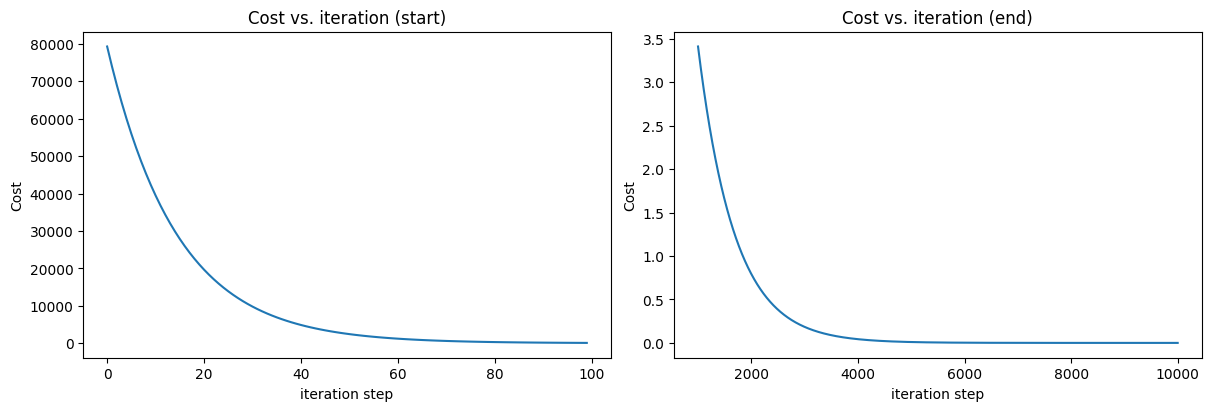

In [11]:

# Plot cost vs. iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration (start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
plt.show()

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


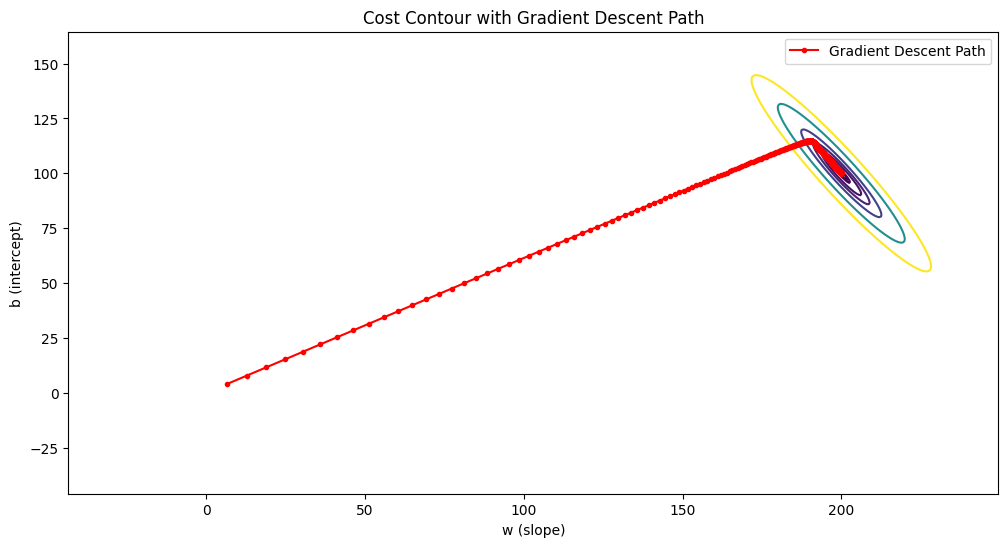

In [12]:
# Predict house prices
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

# Contour plot with gradient descent path
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plot_contour_wgrad(x_train, y_train, p_hist, ax)
plt.show()

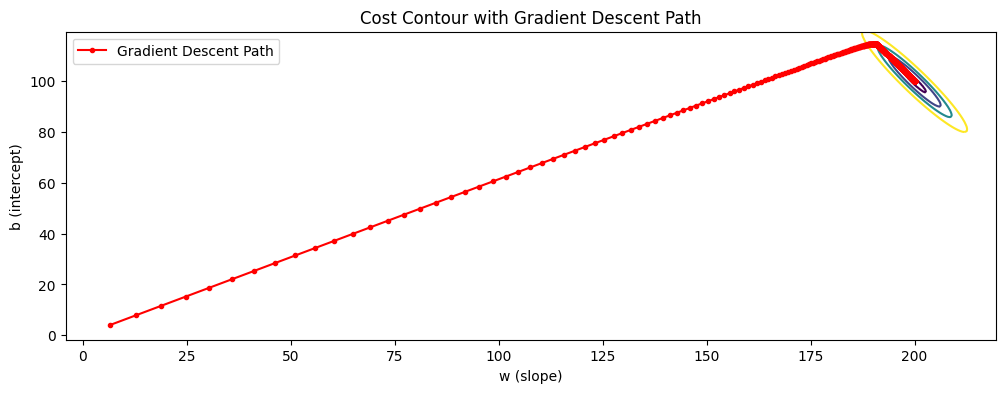

In [13]:
# Contour plot with zoomed-in range
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plot_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
                   contours=[1, 5, 10, 20], resolution=0.5)
plt.show()

Iteration    0: Cost 2.58e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration    1: Cost 7.82e+05  dj_dw:  1.130e+03, dj_db:  7.000e+02   w: -3.840e+02, b:-2.40000e+02
Iteration    2: Cost 2.37e+06  dj_dw: -1.970e+03, dj_db: -1.216e+03   w:  1.192e+03, b: 7.32800e+02
Iteration    3: Cost 7.19e+06  dj_dw:  3.429e+03, dj_db:  2.121e+03   w: -1.551e+03, b:-9.63840e+02
Iteration    4: Cost 2.18e+07  dj_dw: -5.974e+03, dj_db: -3.691e+03   w:  3.228e+03, b: 1.98886e+03
Iteration    5: Cost 6.62e+07  dj_dw:  1.040e+04, dj_db:  6.431e+03   w: -5.095e+03, b:-3.15579e+03
Iteration    6: Cost 2.01e+08  dj_dw: -1.812e+04, dj_db: -1.120e+04   w:  9.402e+03, b: 5.80237e+03
Iteration    7: Cost 6.09e+08  dj_dw:  3.156e+04, dj_db:  1.950e+04   w: -1.584e+04, b:-9.80139e+03
Iteration    8: Cost 1.85e+09  dj_dw: -5.496e+04, dj_db: -3.397e+04   w:  2.813e+04, b: 1.73730e+04
Iteration    9: Cost 5.60e+09  dj_dw:  9.572e+04, dj_db:  5.916e+04   w: -4.845e+04, b:-2.99567e+04


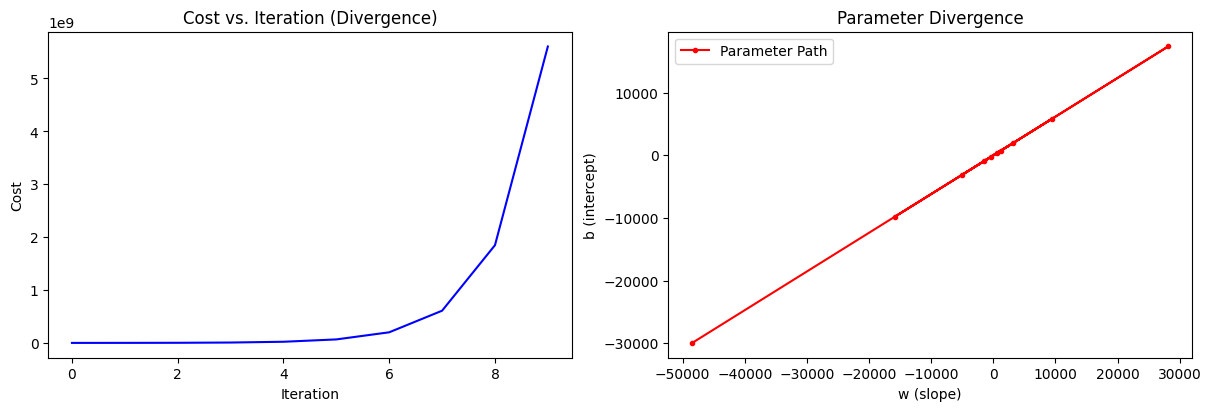

In [14]:
# Run gradient descent with large learning rate
w_init = 0
b_init = 0
iterations = 10
tmp_alpha = 8.0e-1
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
plot_divergence(p_hist, J_hist, x_train, y_train)